In [38]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [20]:
Tdata = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [21]:
Tdata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
Tdata.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
Tdata.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
# Converting TotalCharges to Numerical value

In [32]:
Tdata["TotalCharges"] = pd.to_numeric(Tdata["TotalCharges"],errors='coerce')

In [33]:
Tdata.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [9]:
# As we can see that TotalCharges is ratio of the 

In [6]:
Tdata.loc[Tdata["TotalCharges"].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
Tdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [12]:
# As we can see that Null value to is .15% then we are simple drop the null value

In [34]:
Tdata.dropna(how="any",inplace=True)

In [35]:
Tdata.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
100*Tdata["Churn"].value_counts()/len(Tdata["Churn"])

No     73.421502
Yes    26.578498
Name: Churn, dtype: float64

In [16]:
# Data is highly inbalanced,ratio = 73:27
# so we analyse the data with other feature while taking the target values separatly to get some insights

In [88]:
Tdata["Churn"].value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

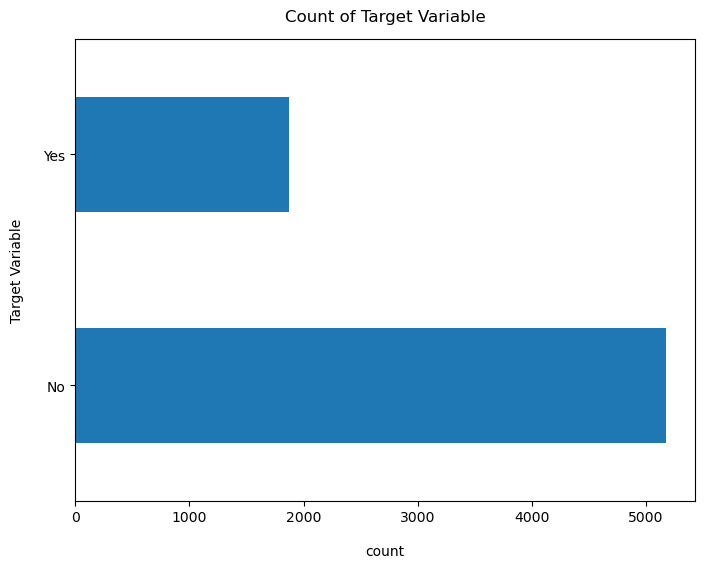

In [30]:
Tdata["Churn"].value_counts().plot(kind="barh",figsize=(8,6))
plt.xlabel("count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of Target Variable",y=1.02);

Text(0.5, 1.02, 'Count of Target Variable per category')

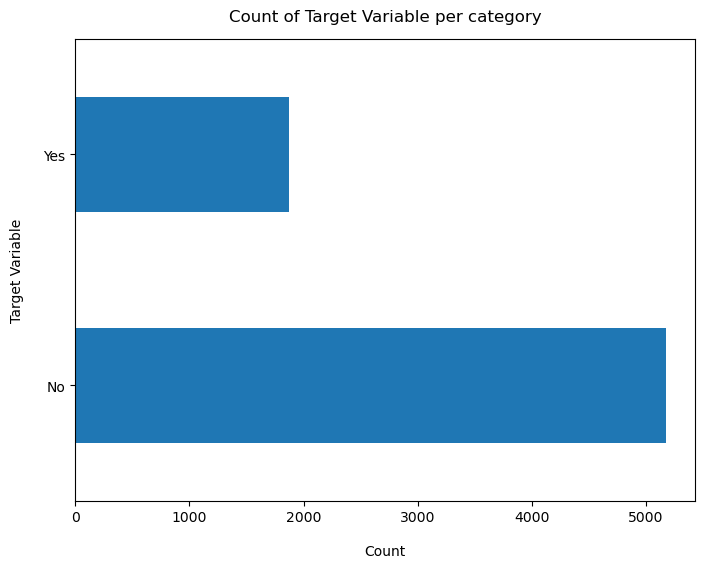

In [31]:
Tdata["Churn"].value_counts().plot(kind="barh",figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of Target Variable per category",y=1.02)

Text(0.5, 1.02, 'Count of Target Variable per Category')

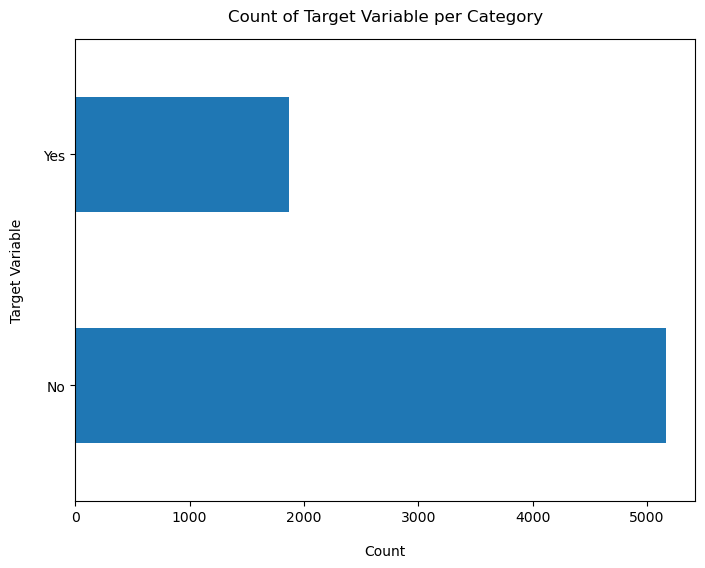

In [64]:
Tdata["Churn"].value_counts().plot(kind="barh",figsize=(8,6))
plt.xlabel("Count",labelpad=14)
plt.ylabel("Target Variable",labelpad=14)
plt.title("Count of Target Variable per Category",y=1.02)

In [65]:
Tdata.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [66]:
Tdata

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


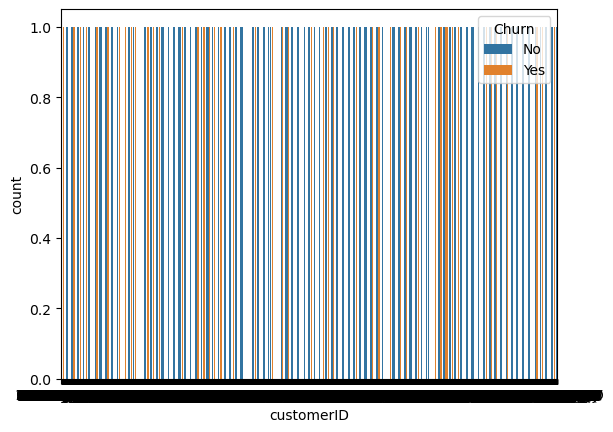

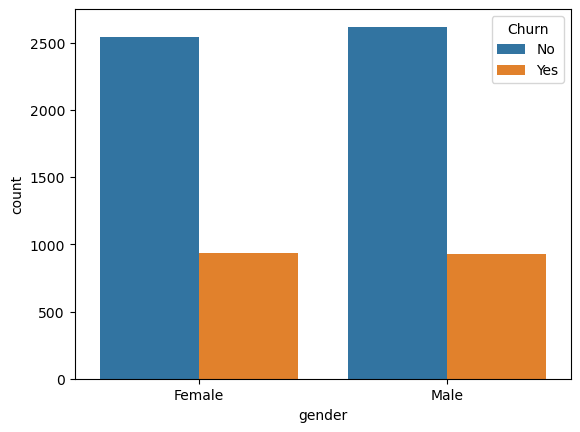

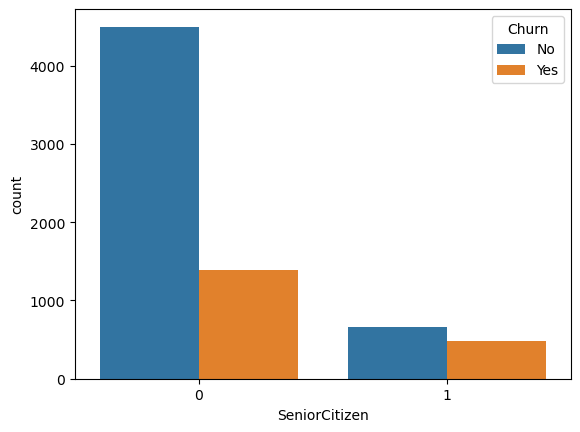

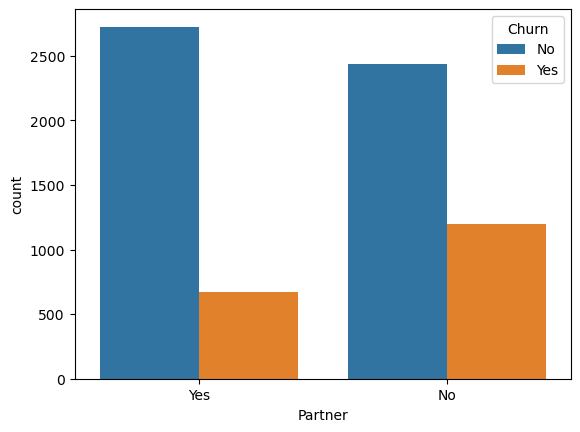

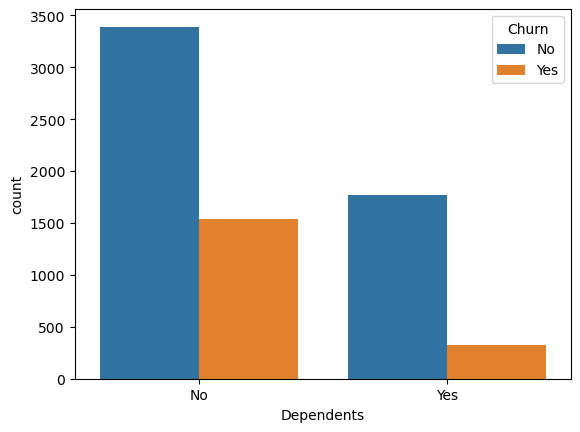

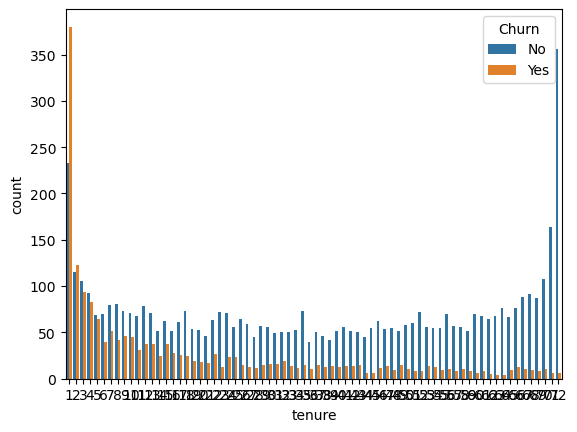

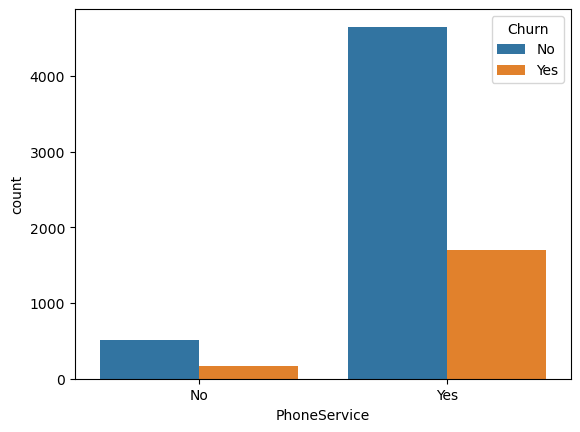

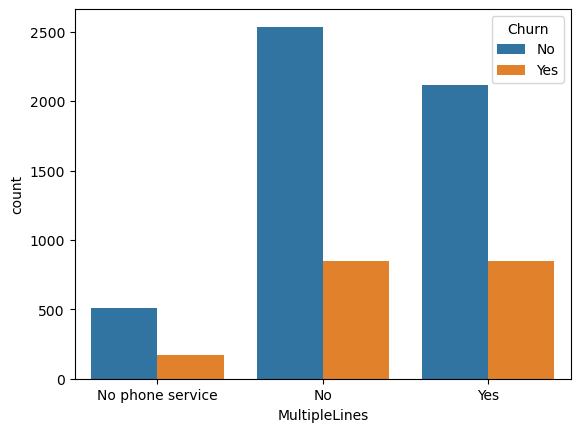

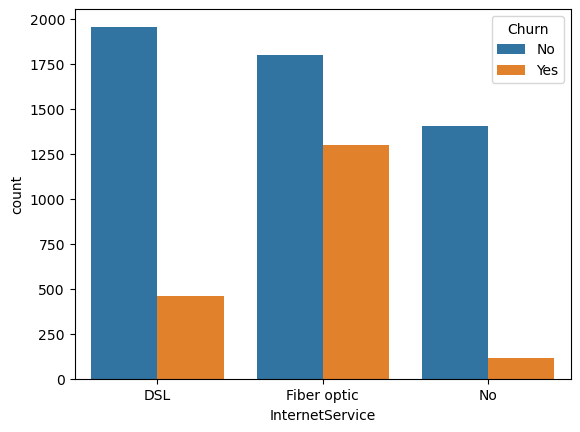

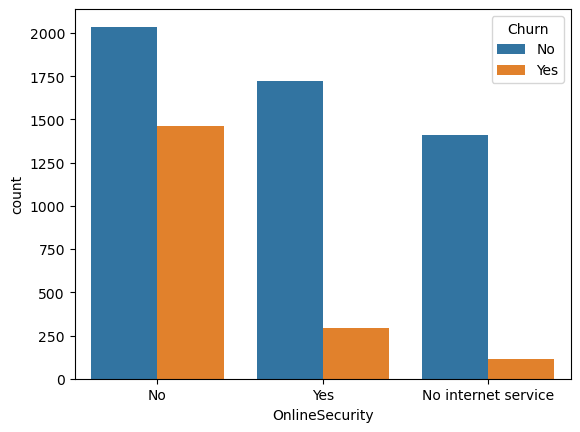

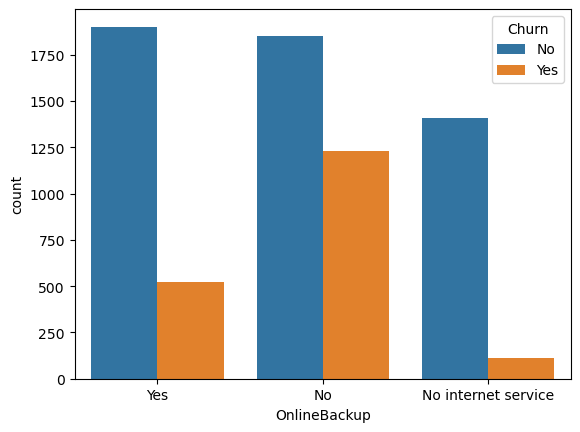

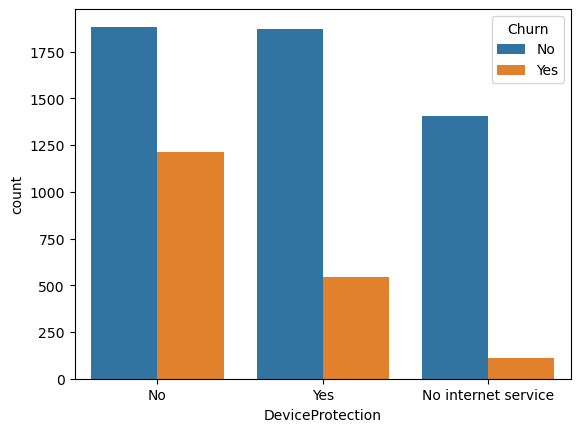

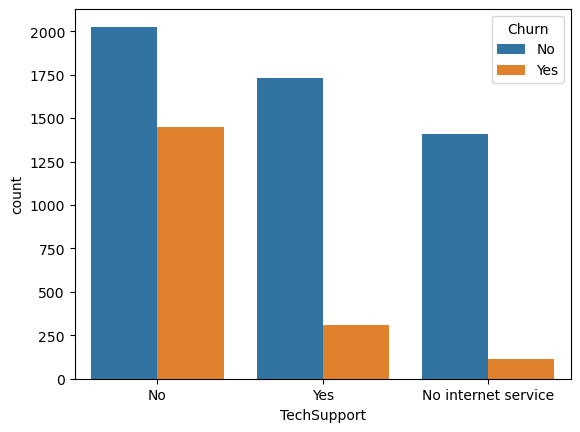

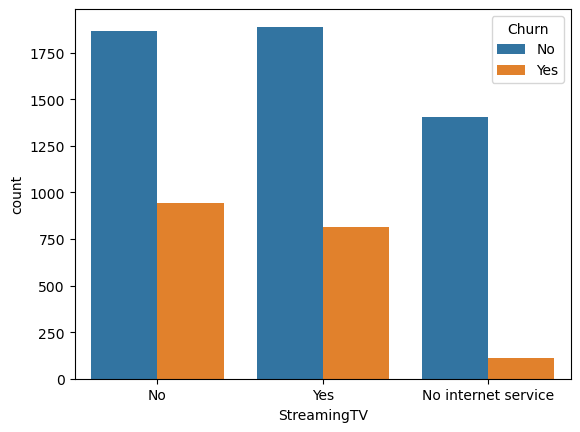

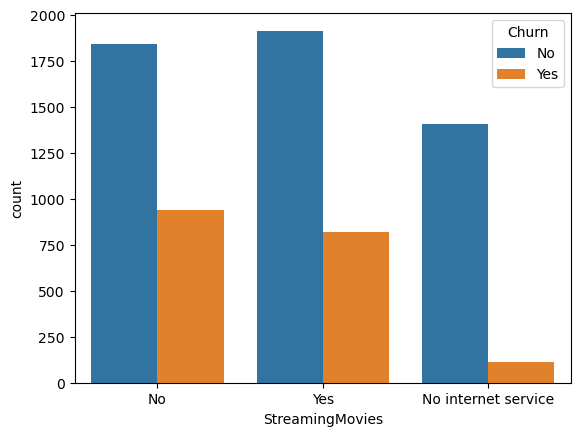

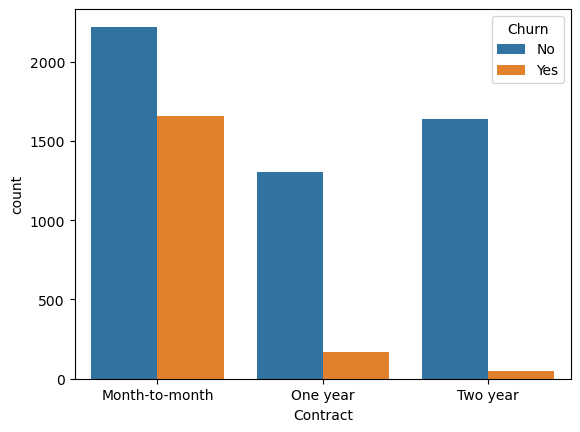

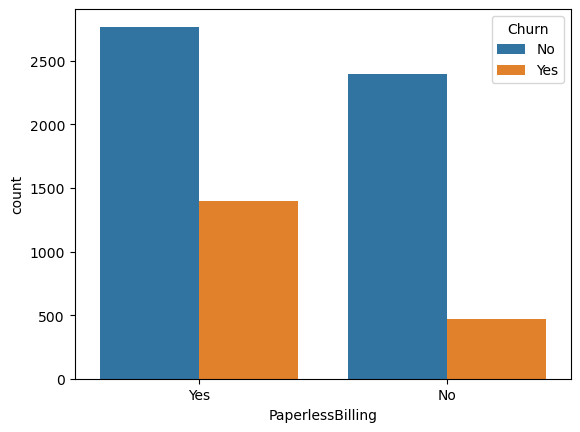

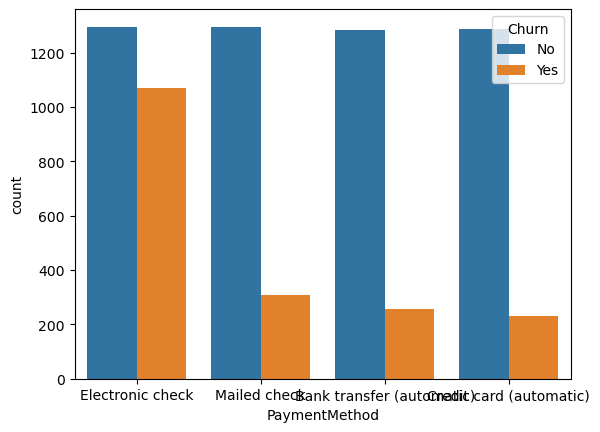

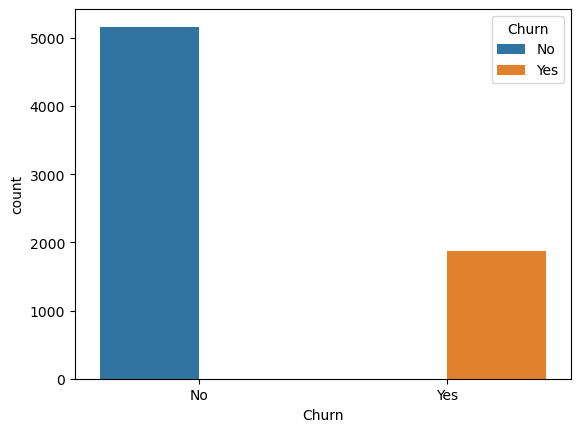

In [67]:
for i,Predicator in enumerate(Tdata.drop(columns=["MonthlyCharges","TotalCharges"],axis=1)):
    plt.figure(i)
    sns.countplot(x=Predicator,hue="Churn",data=Tdata)

In [24]:
Tdata["tenure"].max()

72

In [25]:
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]

Tdata["tenure"] = pd.cut(Tdata.tenure,range(1,80,12),right=False,labels=labels)

In [26]:
Tdata["Churn"] = np.where(Tdata.Churn == "Yes",1,0)

In [27]:
Tdata["Churn"] = np.where(Tdata.Churn == "Yes",1,0)

In [39]:
Tdata["Churn"] = np.where(Tdata.Churn == "Yes",1,0)

In [40]:
Tdata_dummies = pd.get_dummies(Tdata)
Tdata_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


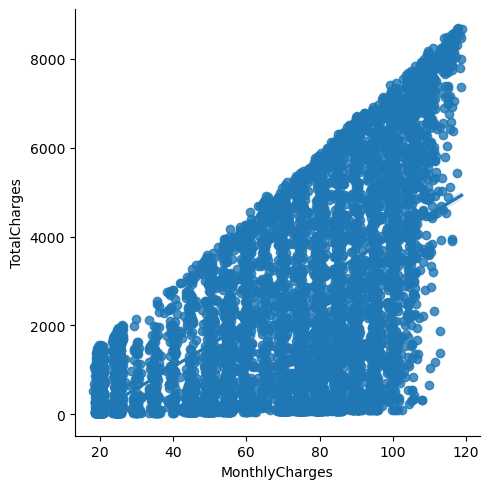

In [30]:
sns.lmplot(data=Tdata_dummies,x="MonthlyCharges",y="TotalCharges")

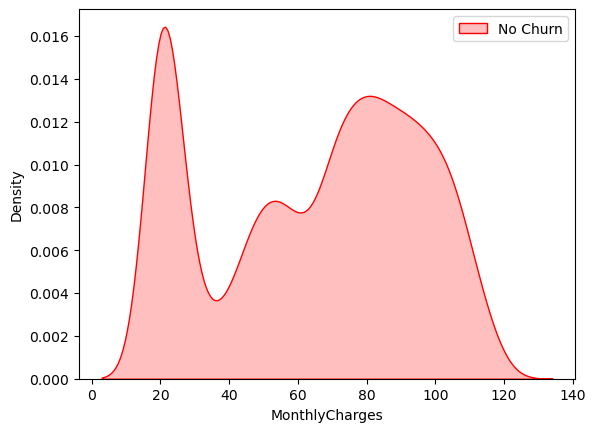

In [31]:
Mth = sns.kdeplot(Tdata_dummies.MonthlyCharges[(Tdata_dummies["Churn"] == 0) ],
           color="Red",shade=True)
Mth = sns.kdeplot(Tdata_dummies.MonthlyCharges[(Tdata_dummies["Churn"] == 1) ],
                 ax=Mth,color="Blue",shade=True)
Mth.legend(["No Churn","Churn"],loc="upper right")

In [82]:
plt.figure(figsize=(20,8))
Tdata_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

NameError: name 'Tdata_dummies' is not defined

<Figure size 2000x800 with 0 Axes>

In [33]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

NameError: name 'telco_data_dummies' is not defined

<Figure size 2000x800 with 0 Axes>

In [ ]:
Tdata.corr().style.background_gradient(cmap="coolwarm")

# Bivariate Analysis

In [ ]:
new_df_target = Tdata.loc[Tdata["Churn"]==0]
new_df_target1 = Tdata.loc[Tdata["Churn"]==1]

In [ ]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

In [ ]:
uniplot(new_df_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='Contract',title='Distribution of Contract for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')

In [ ]:
uniplot(new_df1_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

## Finding from this data

In [ ]:
# Insights from this data


1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners

# Model Building by using Decision Tree classifier

In [46]:
# Dividing the data into training and test set

from sklearn.model_selection import train_test_split
X = Tdata_dummies.drop(['Churn'],axis=1)
y = Tdata_dummies["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [107]:
X_train

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,customerID_0002-ORFBO,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6770,0,4,78.90,299.75,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3382,0,72,25.55,1867.70,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
6768,0,72,117.50,8670.10,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
1698,0,71,84.80,6152.40,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
4542,1,32,79.30,2570.00,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0,4,50.05,179.35,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,1
2161,0,2,75.80,160.75,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4257,0,49,99.40,5025.00,0,0,0,0,0,0,...,1,1,0,0,1,0,0,0,1,0
361,0,41,98.80,3959.15,0,0,0,0,0,0,...,1,0,0,1,0,1,1,0,0,0


In [91]:
print("The number of Samples in train data is {}.".format(X_train.shape[0]))
print("The number of Samples in test data is {}.".format(X_test.shape[1]))

The number of Samples in train data is 5625.
The number of Samples in test data is 20.


### Decision Tree classifier

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
model_dt = DecisionTreeClassifier(criterion="gini",random_state= 100,max_depth=6,min_samples_leaf=8)

In [110]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [114]:
y_predict = model_dt.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 1, 0])

In [116]:
model_dt.score(X_test,y_test)

0.7924662402274343

In [118]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [122]:
print(classification_report(y_test,y_predict,labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1030
           1       0.63      0.55      0.59       377

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



### Now we are going to use the Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
logistic_model= LogisticRegression()

In [71]:
logistic_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
accuracy = logistic_model.score(X_test,y_test)
print("Logistic Regression accuracy:",accuracy*100)

Logistic Regression accuracy: 78.60696517412936


In [77]:
from sklearn.metrics import confusion_matrix
y_pred = logistic_model.predict(X_test)
cm_lr = confusion_matrix(y_test,y_pred)

print(cm_lr)

[[905 120]
 [181 201]]


In [78]:
# Using search CV and L2 Penality for logistic regression